firstly,make the TODOs to code the SVM classifier
1.load train_data, train_label, test_data
2.define loss_function,前向传播
3.反向传播


In [1]:
# import package
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [3]:
# load train and test data
batches_meta = open('F:\PycharmProjects\cs231n\homework_1_SVM\cifar-10-batches-py\\batches.meta','rb')
batches_meat_object = pickle.load(batches_meta,encoding='bytes')
# print(type(batches_meat_object))   # 一个字典格式
# print(batches_meat_object)

train_data = []
train_label = []
for i in range(1,6):
    file_object = open('F:\PycharmProjects\cs231n\homework_1_SVM\cifar-10-batches-py\data_batch_'+str(i),'rb')
    data_object = pickle.load(file_object,encoding='bytes')  # 字典格式
    # print(data_object[b'data'])
    for line in data_object[b'data']:
        train_data.append(line)
    for line in data_object[b'labels']:
        train_label.append(line)
# notice there,train_data and train_label are the structure of python's list,you should transport to numpy's array
train_data = np.array(train_data).astype("float")
train_label = np.array(train_label)
print("train_data shape:"+str(train_data.shape))
print("train_label shape:"+str(train_label.shape))


train_data shape:(50000, 3072)
train_label shape:(50000,)


In [4]:
test_data = []
test_label = []
test_file = open('F:\PycharmProjects\cs231n\homework_1_SVM\cifar-10-batches-py\\test_batch','rb')
test_file_object = pickle.load(test_file,encoding='bytes')
# print(test_file_object)
for line in test_file_object[b'data']:
    test_data.append(line)
for line in test_file_object[b'labels']:
    test_label.append(line)
test_data = np.array(test_data).astype("float")
test_label = np.array(test_label)
print("test_data shape:"+str(test_data.shape))
print("test_label shape:"+str(test_label.shape))
# print(test_label.ndim)


test_data shape:(10000, 3072)
test_label shape:(10000,)


In [5]:
# 正向传播
# 数据预处理
mean_image = np.mean(train_data,axis=0)
train_data -=mean_image
# train_label -=mean_image
test_data -=mean_image
# test_label -=mean_image

train_data = np.hstack((train_data,np.ones([train_data.shape[0],1])))
# train_label = np.hstack(train_label,np.ones([train_label.shape[0],1]))
test_data = np.hstack((test_data,np.ones([test_data.shape[0],1])))
# test_label = np.hstack(test_label,np.ones([test_label.shape[0],1]))



In [6]:
class LinearSVM:
    def __init__(self):
        self.W = None
    
    def loss(self, X, y, reg):
        """
        Structured SVM loss function, vectorized implementation.

        Inputs and outputs are the same as svm_loss_naive.
        """
        loss = 0.0
        dW = np.zeros(self.W.shape) # initialize the gradient as zero

        num_train = X.shape[0]
        scores = X.dot(self.W)
        print("test:")
        print(range(num_train))
        print(list(y))
        print(scores[range(num_train), list(y)])
        correct_class_score = scores[range(num_train), list(y)].reshape(-1,1) # (N,1)  (1,-1)是二维内部转换成一行，（-1，1）转换成1列
        margin = np.maximum(0, scores - correct_class_score + 1)
        margin[range(num_train), list(y)] = 0
        loss = np.sum(margin) / num_train + 0.5 * reg * np.sum(self.W * self.W)
  
        num_classes = self.W.shape[1]
        inter_mat = np.zeros((num_train, num_classes))
        inter_mat[margin > 0] = 1
        inter_mat[range(num_train), list(y)] = 0
        inter_mat[range(num_train), list(y)] = -np.sum(inter_mat, axis=1)

        dW = (X.T).dot(inter_mat)
        dW = dW/num_train + reg*self.W

        return loss, dW
    
    def train(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=100,
            batch_size=200, verbose=False):
        """
        Train this linear classifier using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.
        - y: A numpy array of shape (N,) containing training labels; y[i] = c
          means that X[i] has label 0 <= c < C for C classes.
        - learning_rate: (float) learning rate for optimization.
        - reg: (float) regularization strength.
        - num_iters: (integer) number of steps to take when optimizing
        - batch_size: (integer) number of training examples to use at each step.
        - verbose: (boolean) If true, print progress during optimization.

        Outputs:
        A list containing the value of the loss function at each training iteration.
        """
        num_train, dim = X.shape
        num_classes = np.max(y) + 1 # assume y takes values 0...K-1 where K is number of classes
        if self.W is None:
            # lazily initialize W
            self.W = 0.001 * np.random.randn(dim, num_classes)

        # Run stochastic gradient descent to optimize W
        loss_history = []
        for it in range(num_iters):
            X_batch = None
            y_batch = None
            idx_batch = np.random.choice(num_train, batch_size, replace = True)
            X_batch = X[idx_batch]
            y_batch = y[idx_batch]

            # evaluate loss and gradient
            loss, grad = self.loss(X_batch, y_batch, reg)
            loss_history.append(loss)

            self.W -=  learning_rate * grad

            if verbose and it % 100 == 0:
                print('iteration %d / %d: loss %f' % (it, num_iters, loss))

        return loss_history
    
    def predict(self, X):
        """
        Use the trained weights of this linear classifier to predict labels for
        data points.

        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.

        Returns:
        - y_pred: Predicted labels for the data in X. y_pred is a 1-dimensional
          array of length N, and each element is an integer giving the predicted
          class.
        """
        y_pred = np.zeros(X.shape[0])
        scores = X.dot(self.W)
        y_pred = np.argmax(scores, axis = 1)
        return y_pred

test:
range(0, 200)
[0, 5, 3, 5, 2, 1, 2, 5, 0, 5, 5, 5, 4, 4, 3, 6, 8, 5, 5, 6, 9, 2, 8, 5, 7, 4, 0, 3, 1, 0, 4, 8, 9, 8, 3, 6, 0, 3, 7, 3, 3, 7, 8, 3, 0, 0, 8, 5, 7, 8, 8, 7, 6, 0, 6, 0, 6, 9, 5, 7, 0, 0, 8, 7, 9, 2, 7, 1, 8, 3, 7, 4, 1, 0, 2, 0, 2, 8, 4, 8, 8, 4, 6, 1, 8, 2, 5, 7, 6, 6, 5, 2, 1, 4, 3, 7, 4, 2, 7, 5, 1, 8, 4, 7, 5, 3, 7, 4, 5, 8, 6, 0, 8, 6, 5, 5, 2, 1, 7, 7, 3, 0, 6, 1, 8, 7, 5, 8, 8, 5, 4, 9, 3, 2, 8, 4, 9, 6, 0, 3, 8, 0, 8, 6, 4, 0, 1, 4, 9, 1, 3, 2, 1, 3, 5, 0, 2, 5, 8, 8, 9, 2, 6, 3, 3, 9, 7, 4, 8, 8, 8, 6, 5, 1, 5, 8, 0, 2, 1, 8, 2, 9, 4, 4, 7, 1, 4, 6, 2, 6, 8, 9, 2, 0, 7, 3, 0, 6, 8, 6]
[-1.53131651 -6.52301095  4.67149867  1.08632682  1.72251623 -1.05479758
 -2.29544006 -0.60361245 -0.64684501 -0.02191222 -2.54391591 -0.85165695
  0.3070044  -2.48938173  1.14058475  0.91738243  1.16072783  0.21758324
 -9.24252469 -2.25329428  4.5240248  -4.05743634 -1.5218249  -6.74364455
 -1.95354901 -2.28043535 -3.11970074  2.03940476  1.7704931  -1.45035714
  2.52113652 -

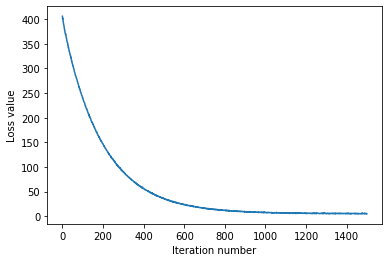

In [7]:
svm = LinearSVM()

loss_hist = svm.train(train_data, train_label, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)


plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [8]:
y_train_pred = svm.predict(train_data)
print("train accuracy: %f" % (np.mean(train_label == y_train_pred)))
y_test_pred = svm.predict(test_data)
print('accuracy: %f' % (np.mean(test_label== y_test_pred)))


train accuracy: 0.381240
accuracy: 0.373300
